# Covariates - UHT Milk Market

In [1]:
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf
import pandas as pd

from utils import get_filtered_data, create_future_dataframe, plot_series

In [2]:
#Reading the data
df = get_filtered_data()

## Visualizing the Data

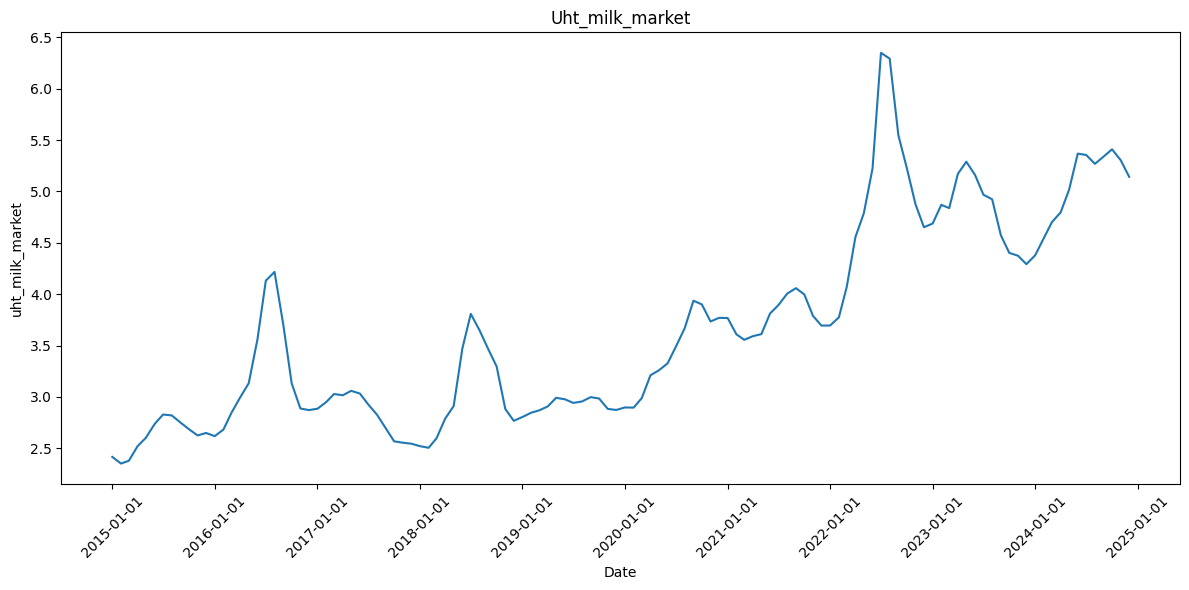

In [3]:
uht_milk_market = df[['date', 'uht_milk_market']] 
plot_series(uht_milk_market, 'uht_milk_market')

The `UHT Milk Market` variable as the other covariates displays an increasing trend. By the plot above we can't see a clear sazonality. We might think that the pattern of price spike at the beggining of the year and a drop at the end might continue, but we can't be sure about it.

## Simple OLS Model

In [4]:
uht_milk_market = (
    uht_milk_market
    .assign(
        t = range(len(uht_milk_market)),
        month = uht_milk_market["date"].dt.month
    )
)

# Fit linear regression with trend + seasonal dummies
model_uht_milk_market = smf.ols("uht_milk_market ~ t + C(month)", data=uht_milk_market).fit()

In [6]:
uht_milk_market['fitted'] = model_uht_milk_market.fittedvalues
model_uht_milk_market.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        uht_milk_market   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     28.11
Date:                Tue, 30 Sep 2025   Prob (F-statistic):           1.04e-27
Time:                        16:16:49   Log-Likelihood:                -80.900
No. Observations:                 120   AIC:                             187.8
Df Residuals:                     107   BIC:                             224.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.0120      0.175     11.528      0.000       1.666       2.358
C(month)[T.2]      0.0126      0.225      0.056      0.955      -0.433       0.458
C(month)[T.3]      0.0739      0.225      0.329      0.743      -0.372       0.520
C(month)[T.4]      0.2191      0.225      0.974      0.332      -0.227       0.665
C(month)[T.5]      0.3064      0.225      1.362      0.176      -0.140       0.752
C(month)[T.6]      0.4840      0.225      2.151      0.034       0.038       0.930
C(month)[T.7]      0.6633      0.225      2.948      0.004       0.217       1.109
C(month)[T.8]      0.6335      0.225      2.814      0.006       0.187       1.080
C(month)[T.9]      0.4544      0.225      2.018      0.046       0.008       0.901
C(month)[T.10]     0.2846      0.225      1.264      0.209      -0.162       0.731
C(month)[T.11]     0.0915      0.225      0.406      0.685      -0.355       0.538
C(month)[T.12]     0.0032      0.225      0.014      0.989      -0.444       0.450
t                  0.0232      0.001     17.444      0.000       0.021       0.026
==============================================================================
Omnibus:                        9.725   Durbin-Watson:                   0.140
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.746
Skew:                           0.615   Prob(JB):                      0.00765
Kurtosis:                       3.662   Cond. No.                         857.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Visualizing the Fitted Model

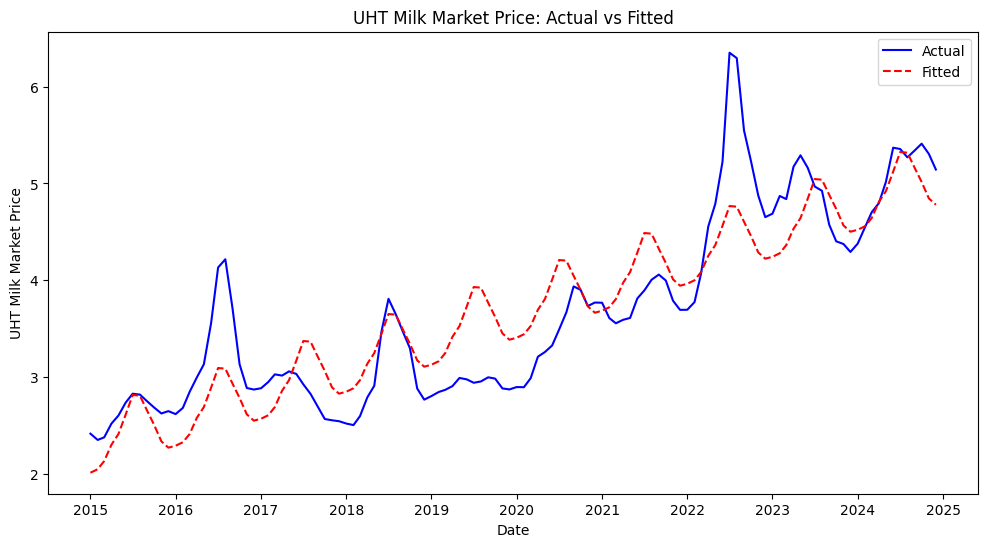

In [8]:
uht_milk_market['fitted'] = model_uht_milk_market.fittedvalues

# Plot actual vs fitted
plt.figure(figsize=(12, 6))
plt.plot(uht_milk_market["date"], uht_milk_market["uht_milk_market"], label="Actual", color="blue")
plt.plot(uht_milk_market["date"], uht_milk_market["fitted"], label="Fitted", color="red", linestyle="--")

plt.title("UHT Milk Market Price: Actual vs Fitted")
plt.xlabel("Date")
plt.ylabel("UHT Milk Market Price")
plt.legend()
plt.show()

## Visualizing the Predictions on the Test Set

In [9]:
test_df = create_future_dataframe() 

uht_milk_market = (
    uht_milk_market
    .assign(
        t = range(len(uht_milk_market)),
        month = uht_milk_market["date"].dt.month
    )
)

# Fit linear regression with trend + seasonal dummies
model_uht_milk_market = smf.ols("uht_milk_market ~ t + C(month)", data=uht_milk_market).fit()

## Predictions on Test Set

In [10]:
test_df = create_future_dataframe()

uht_milk_market_preds = model_uht_milk_market.predict(test_df)
test_df['uht_milk_market'] = uht_milk_market_preds

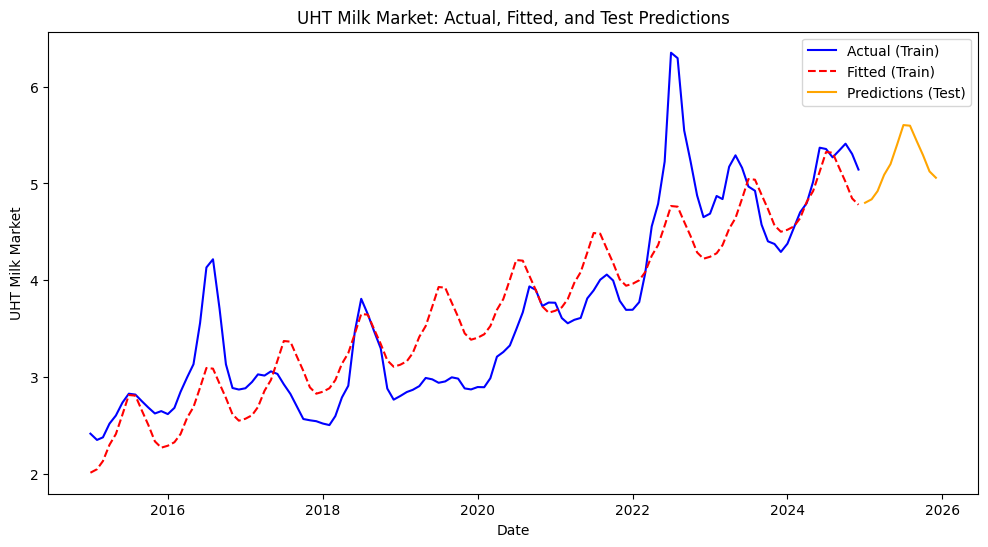

In [12]:
# Plot
plt.figure(figsize=(12, 6))

# Actual (train only)
plt.plot(uht_milk_market["date"], uht_milk_market["uht_milk_market"],
         label="Actual (Train)", color="blue") 

# Fitted (train only)
plt.plot(uht_milk_market["date"], uht_milk_market["fitted"],
         label="Fitted (Train)", color="red", linestyle="--")

# Predictions (test only)
plt.plot(test_df["date"], test_df["uht_milk_market"],
         label="Predictions (Test)", color="orange")

plt.title("UHT Milk Market: Actual, Fitted, and Test Predictions")
plt.xlabel("Date")
plt.ylabel("UHT Milk Market")
plt.legend()
plt.show()

## Saving the Predictions

In [15]:
test_df[['date', 'uht_milk_market']].to_csv("../../predictions/2025_uht_milk_market.csv", index=False)